# Scénario 1 : Premier Algorithme testé MSE et SSIM

Mean Squared Error (MSE) : Représente l'erreur quadratique cumulée entre l'image compressée et l' image d' origine

Structural Similarity Index (SSIM) : une mesure perceptuelle qui quantifie la dégradation de la qualité de l' image




L'algorithme que nous utiliserons pour la détection des visages est le MTCNN (Multi-Task Convoluted Neural Networks) 
La détection du visage est la première taches qu’on a abordée pour notre backend IA , cette étape est indispensable avant d’implémenter les algorithmes de comparaison 

# Mean Squared Error (MSE) 
MSE est simple à mettre en œuvre - mais lorsque on a utéilisé le pour la similitude, on a rencontré des problèmes. Le principal étant que de grandes distances entre les intensités de pixels ne signifient pas nécessairement que le contenu des images est radicalement différent. Il est important de noter qu'une valeur de 0 pour MSE indique une similitude parfaite. Une valeur supérieure à un implique moins de similitude et continuera de croître à mesure que la différence moyenne entre les intensités de pixels augmente également
# Structural Similarity Index (SSIM).
La méthode SSIM est clairement plus impliquée que la méthode MSE, mais l'essentiel est que SSIM tente de modéliser le changement perçu dans les informations structurelles de l'image, tandis que MSE estime en fait les erreurs perçues. Il y a une différence subtile entre les deux, mais les résultats sont spectaculaires. contrairement à MSE, la valeur SSIM peut varier entre -1 et 1, où 1 indique une similitude parfaite.


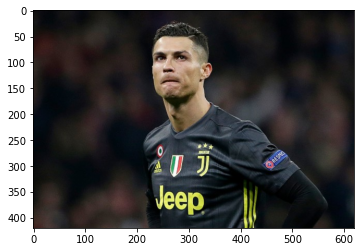

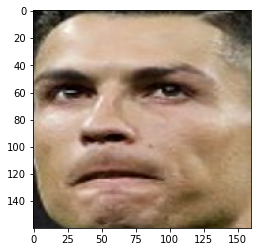

In [3]:
# function for face detection with mtcnn
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt
# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
	# load image from file
	image = Image.open(filename)
	# convert to RGB, if needed
	image = image.convert('RGB')
	# convert to array
	pixels = asarray(image)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	# bug fix
	x1, y1 = abs(x1), abs(y1)
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

# load the photo 
image = Image.open("ronaldo.jpg")
image = image.convert('RGB')
pixels = asarray(image)
image.rotate(1).show()
plt.imshow(image)
plt.show()

# load the photo and extract the face
pixels = extract_face('ronaldo.jpg')
plt.imshow(pixels)
plt.show()



### Premier etape consiste a detecter le visage seulement de tous les photos 



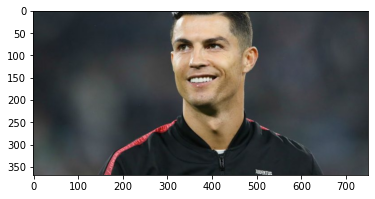

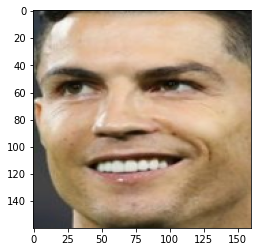

In [4]:
# load the photo 
image = Image.open("ronaldo2.jpg")
image = image.convert('RGB')
pixels = asarray(image)
image.rotate(1).show()
plt.imshow(image)
plt.show()
# load the photo and extract the face
pixels = extract_face('ronaldo2.jpg')
plt.imshow(pixels)
plt.show()

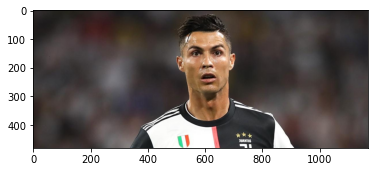

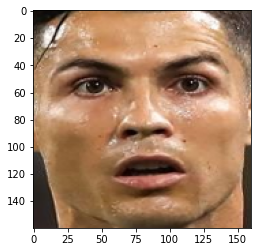

In [5]:
# load the photo 
image = Image.open("ronaldo3.jpg")
image = image.convert('RGB')
pixels = asarray(image)
image.rotate(1).show()
plt.imshow(image)
plt.show()
# load the photo and extract the face
pixels = extract_face('ronaldo3.jpg')
plt.imshow(pixels)
plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.measure import compare_ssim as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2
from ipykernel import kernelapp as app


In [7]:

def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err
def compare_images(imageA, imageB, title):
 	# compute the mean squared error and structural similarity
 	# index for the images
 	m = mse(imageA, imageB)
 	s = ssim(imageA, imageB)
 	# setup the figure
 	fig = plt.figure(title)
 	plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
 	# show first image
 	ax = fig.add_subplot(1, 2, 1)
 	plt.imshow(imageA, cmap = plt.cm.gray)
 	plt.axis("off")
 	# show the second image
 	ax = fig.add_subplot(1, 2, 2)
 	plt.imshow(imageB, cmap = plt.cm.gray)
 	plt.axis("off")
 	# show the images
 	plt.show() 

Nous convertissons ensuite nos images en niveaux de gris Nous définissons ensuite la fonction compare_images que nous utiliserons pour comparer deux images en utilisant à la fois MSE et SSIM. 
La mse fonction prend trois arguments: ronaldo 2 et  ronaldo 3  , qui sont les deux images que nous allons comparer, puis la photo originale 
gèrent un simple traçage matplotlib. Nous affichons simplement le MSE et le SSIM associés aux deux images que nous comparons


In [8]:
import cv2
# load the images -- the original, the original + contrast,
# and the original + photoshop
original = cv2.imread("image1.png")
ronaldo2 = cv2.imread("image2.png")
ronaldo3 = cv2.imread("image3.png")
# convert the images to grayscale
original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
ronaldo2 = cv2.cvtColor(ronaldo2, cv2.COLOR_BGR2GRAY)
ronaldo3 = cv2.cvtColor(ronaldo3, cv2.COLOR_BGR2GRAY)

#

## Résultat : 



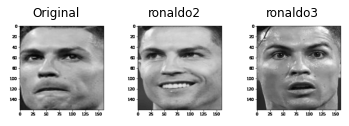

C:\Users\FAIZ\anaconda3\envs\tf2gpu\lib\site-packages\ipykernel_launcher.py:15: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  from ipykernel import kernelapp as app


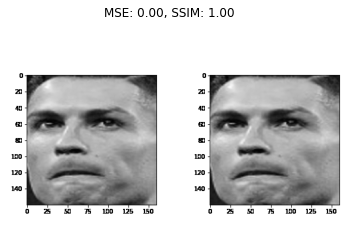

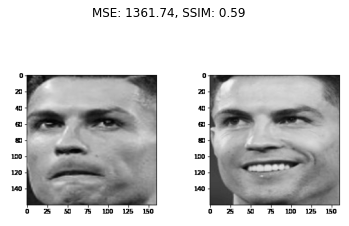

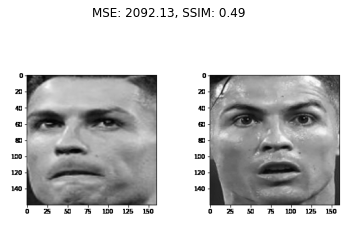

In [9]:
# initialize the figure
import matplotlib.pyplot as plt
fig = plt.figure("Images")
images = ("Original", original), ("ronaldo2", ronaldo2), ("ronaldo3", ronaldo3)
# loop over the images
for (i, (name, image)) in enumerate(images):
	# show the image
	ax = fig.add_subplot(1, 3, i + 1)
	ax.set_title(name)
	plt.imshow(image, cmap = plt.cm.gray)
	plt.axis("off")
# show the figure
plt.show()
# compare the images
compare_images(original, original, "Original vs. Original")
compare_images(original, ronaldo2, "Original vs. ronaldo2")
compare_images(original, ronaldo3, "Original vs. ronalado3")

il n'est pas surprenant que l'image d'origine soit identique à elle-même, avec une valeur de 0,0 pour MSE et de 1,0 pour SSIM. Onrappelle que lorsque le MSE augmente, les images sont moins similaires , contrairement au SSIM où des valeurs plus petites  indiquent moins de similitude.
L’algorithme est testé sur plusieurs photos de différents couleurs ainsi que les photos modifiés (photoshopés) , malheureusement une variation sur les résultats est remarquée sur les images modifiées ce qui nous pousse à rechercher une autre  alternative et un autre algorithme plus puissant et plus exacte sur les résultats 
